In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from torchvision import transforms, utils
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import cxr_dataset as CXR
from tqdm import tqdm
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

d:\machineLearning\miniconda\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# reading the data
data = pd.read_csv("nih_labels.csv")
data.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Cardiomegaly,Emphysema,Effusion,Hernia,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold
0,00000001_000.png,0,1,058Y,M,PA,1,0,0,0,...,0,0,0,0,0,0,0,0,0,train
1,00000001_001.png,1,1,058Y,M,PA,1,1,0,0,...,0,0,0,0,0,0,0,0,0,train
2,00000001_002.png,2,1,058Y,M,PA,1,0,1,0,...,0,0,0,0,0,0,0,0,0,train
3,00000002_000.png,0,2,081Y,M,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
4,00000003_000.png,0,3,081Y,F,PA,0,0,0,1,...,0,0,0,0,0,0,0,0,0,train


In [4]:
# get shape of data
print('shape of data : ',data.shape)

shape of data :  (112120, 21)


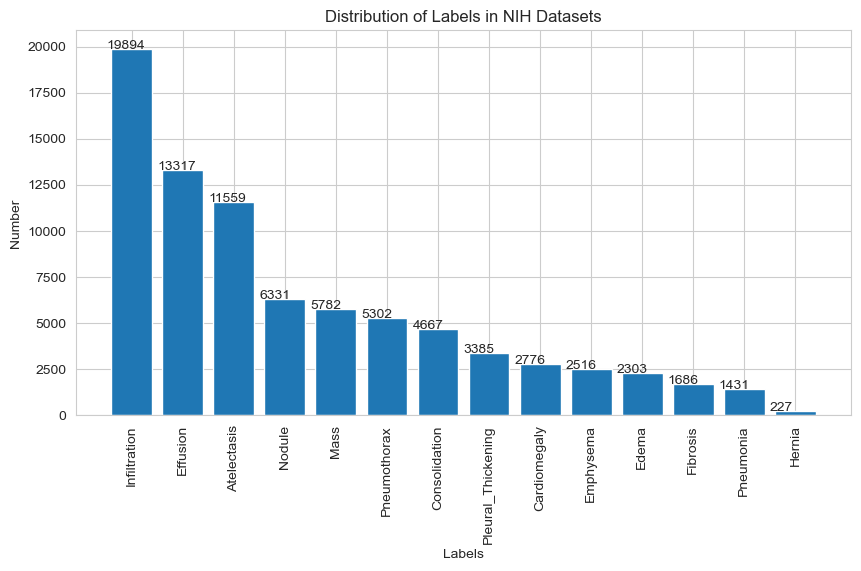

In [5]:
label = ['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Pneumothorax','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia']
data_disease = data[label]
disease_counts = data_disease.sum().sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.bar(np.arange(len(disease_counts))+0.5, disease_counts)
ax1.set_xticks(np.arange(len(disease_counts))+0.5)
ax1.set_xticklabels(disease_counts.index, rotation = 90)
plt.xlabel('Labels')
plt.ylabel('Number')
plt.title('Distribution of Labels in NIH Datasets')
for i, count in enumerate(disease_counts):
    plt.text(i, count+5, count, fontsize=10)
plt.show()

In [80]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
data_transforms = {
        'train': transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.Resize(224),
            # because resize doesn't always give 224 x 224, this ensures 224 x
            # 224
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ]),
        'val': transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ]),
    }

# create train/val dataloaders
transformed_datasets = {}
transformed_datasets['train'] = CXR.CXRDataset(
        path_to_images="imgdata/images-NIH-224/",
        fold='train',
        transform=data_transforms['train'])
transformed_datasets['val'] = CXR.CXRDataset(
        path_to_images="imgdata/images-NIH-224/",
        fold='val',
        transform=data_transforms['val'])

img_size = torch.Size([3, 224, 224])
label =
      Cardiomegaly
      Effusion
img_id = 00000001_002.png


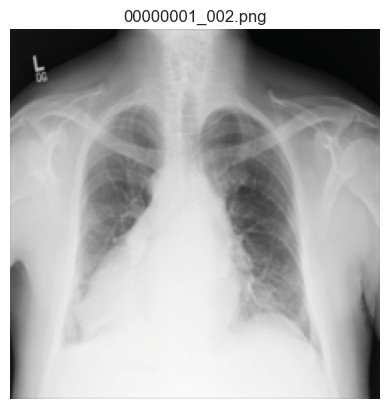

In [81]:
inputs, labels, filename =transformed_datasets['train'][2]
print('img_size =', inputs.size())
print('label =')
for i in range(len(label)):
    if labels[i] == 1:
        print('     ',label[i])
print('img_id =', id)
cxr=inputs.numpy().squeeze().transpose(1,2,0)    
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
cxr = std * cxr + mean
cxr = np.clip(cxr, 0, 1)
# Display the image
plt.imshow(cxr)
plt.axis('off')
plt.title(id)
plt.show()

In [68]:
transformed_datasets['train']

100%|██████████| 78468/78468 [02:06<00:00, 619.81it/s]


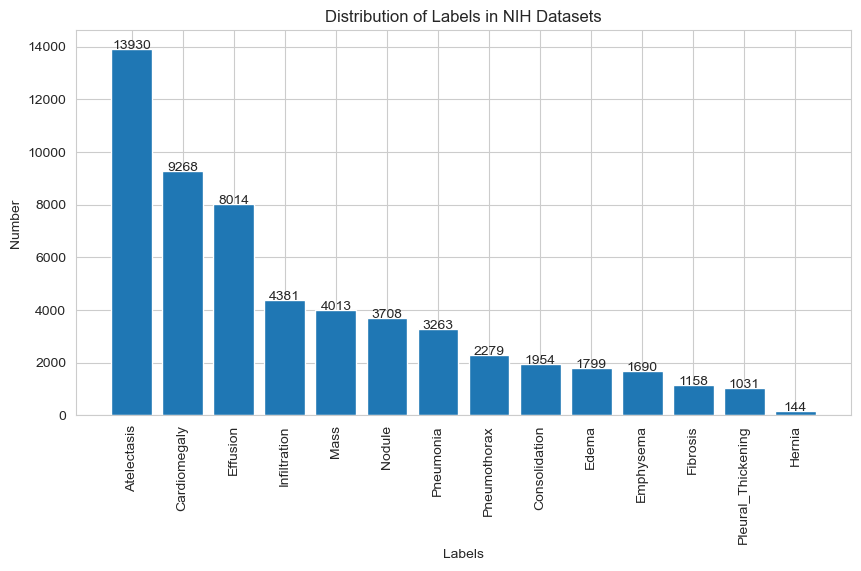

In [118]:
label_counter_train = [0]*14
for inputs, labels, filename in tqdm(transformed_datasets['train']):
    label_counter_train += labels
    
# Create a pandas Series object
disease_counts_train = pd.Series(label_counter_train, index=labels).sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.bar(label, disease_counts_train)
ax1.set_xticks(np.arange(len(disease_counts_train)))
ax1.set_xticklabels(label, rotation = 90)
plt.xlabel('Labels')
plt.ylabel('Number')
plt.title('Distribution of Labels in NIH Datasets')
for i, count in enumerate(disease_counts_train):
    plt.text(i, count+5, count, ha = 'center', fontsize=10)
plt.show()


100%|██████████| 11219/11219 [00:21<00:00, 516.76it/s]


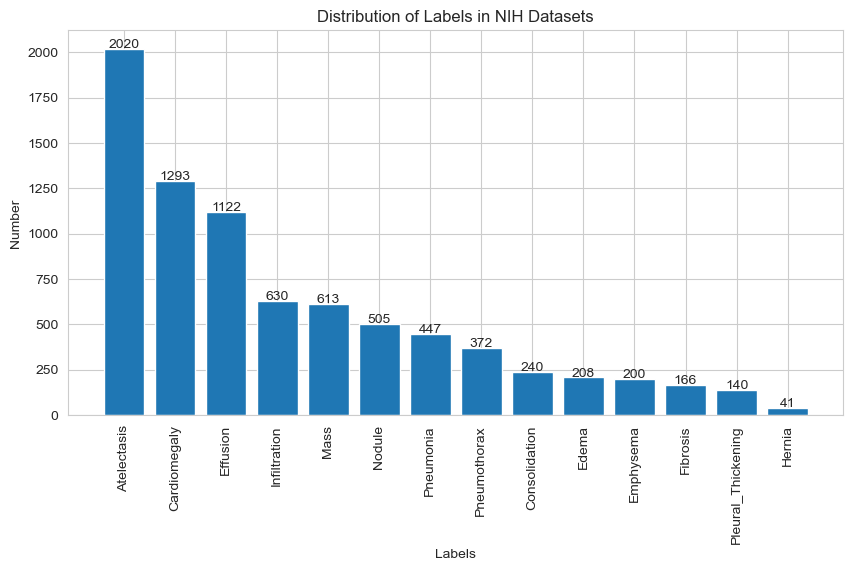

In [119]:
label_counter_val = [0]*14
for inputs, labels, filename in tqdm(transformed_datasets['val']):
    label_counter_val += labels
    
# Create a pandas Series object
disease_counts_val = pd.Series(label_counter_val, index=labels).sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.bar(label, disease_counts_val)
ax1.set_xticks(np.arange(len(disease_counts_val)))
ax1.set_xticklabels(label, rotation = 90)
plt.xlabel('Labels')
plt.ylabel('Number')
plt.title('Distribution of Labels in NIH Datasets')
for i, count in enumerate(disease_counts_val):
    plt.text(i, count+5, count, ha = 'center', fontsize=10)
plt.show()
